In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


In [157]:
df = pd.read_csv('./diamonds.csv')
df_dummy = pd.get_dummies(df['cut'])
df = pd.concat([df, df_dummy], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Fair,Good,Ideal,Premium,Very Good
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,1


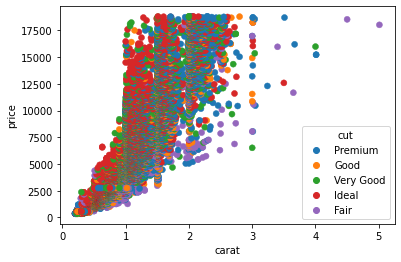

In [158]:
sns.scatterplot(data = df,x='carat', y='price', edgecolor=None, hue='cut');


In [159]:
df = pd.read_csv('./diamonds.csv')
df_dummy = pd.get_dummies(df['color'])
df = pd.concat([df, df_dummy], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,0,0,1


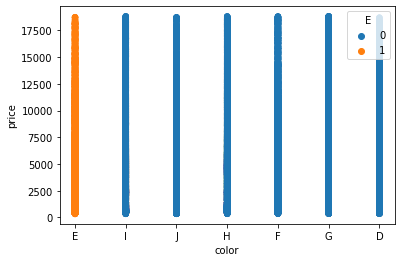

In [160]:
sns.scatterplot(data = df,x='color', y='price', edgecolor=None, hue='E');


In [161]:
df = pd.read_csv('./diamonds.csv')
df_dummy = pd.get_dummies(df['clarity'])
df = pd.concat([df, df_dummy], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,0,0,0,1


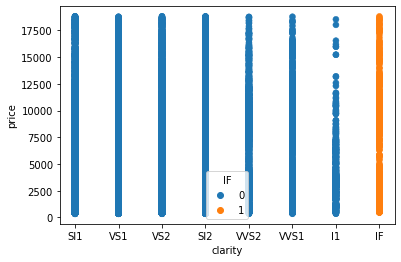

In [162]:
sns.scatterplot(data = df,x='clarity', y='price', edgecolor=None, hue='IF');


In [163]:
#diamonds['price_predict']
df['price_predicted'] = ''
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price_predicted
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,0,0,0,1,


In [164]:
df.describe()

,carat,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,0.013445,0.032959,0.241765,0.169738,0.152207,0.227319,0.067859,0.094708
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,0.115172,0.178530,0.428157,0.375407,0.359225,0.419105,0.251506,0.292814
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
def price(clarity):
    if clarity == 'SI1':
      return 1
    elif clarity == 'VS1':
      return 4
    elif clarity == 'VS2':
      return 3
    elif clarity == 'SI2':
      return 2
    elif clarity == 'VVS2':
      return 5
    elif clarity == 'VVS1':
      return 6
    elif clarity == 'IF':
      return 7
    elif clarity == 'I1':
      return 0
    else:
      return np.nan

price('SI2')
price('I1')

0

In [166]:
df['clarity_number'] = df.clarity.map(price)

In [167]:
def price_color(color):
    if color == 'E':
      return 5
    elif color == 'I':
      return 1
    elif color == 'J':
      return 0
    elif color == 'H':
      return 2
    elif color == 'F':
      return 4
    elif color == 'G':
      return 3
    elif color == 'D':
      return 6
    else:
      return np.nan

In [168]:
df['color_number'] = df.color.map(price_color)

In [169]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price_predicted,clarity_number,color_number
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,1,0,0,0,0,0,,1,5
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,1,0,0,0,,4,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,0,0,0,1,0,0,,3,1
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,0,0,,2,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,...,0,0,0,0,0,0,1,,5,0


/home/marianneag/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


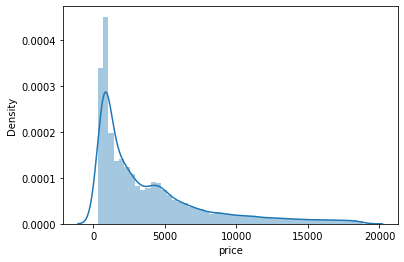

In [170]:
sns.distplot(df['price']);

Gráfico sugere uma concetração de preço em uma caracteristica

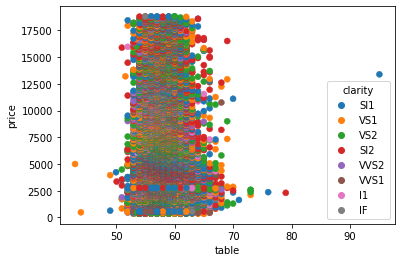

In [171]:
sns.scatterplot(data = df,x='table', y='price', edgecolor=None, hue='clarity');


/home/marianneag/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


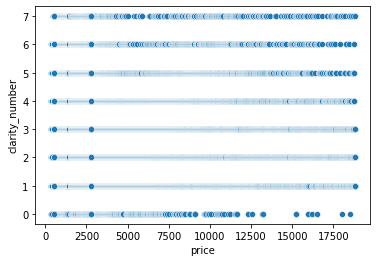

In [172]:
sns.scatterplot(df.price, df.clarity_number);


/home/marianneag/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


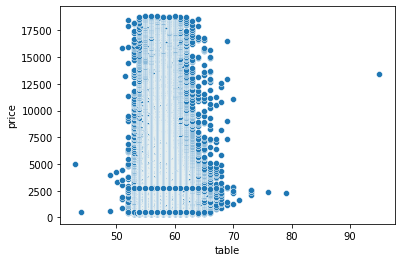

In [173]:
sns.scatterplot(df.table, df.price);


In [174]:
pd.get_dummies(df)

,carat,depth,table,price,x,y,z,I1,IF,SI1,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price_predicted_
0,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,62.7,59.0,2757,5.69,5.73,3.58,0,0,1,...,0,0,0,1,0,0,0,0,0,1
48936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,1,0,0,0,0,0,1
48937,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,...,0,0,0,1,0,0,0,0,0,1
48938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [175]:
diamonds['cut_category'] = ''
diamonds.head()


NameError: name 'diamonds' is not defined

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted,color_number,clarity_number
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,,5,1
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,,0,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,,0,5


In [ ]:
print(diamonds['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted,color_number,clarity_number
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,,5,1
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,,0,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,,0,5


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z,color_number,clarity_number
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.407254,2.983429
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.699858,1.710759
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,1.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,6.000000,7.000000


In [176]:
df = df.reset_index()


In [177]:
from sklearn.linear_model import LinearRegression

X = df[['carat', 'clarity_number', 'color_number', 'table']] # dataframe
y = df['price'] # series

model = LinearRegression()
model.fit(X, y)

LinearRegression()

#Nosso modelo Coeficiente Linear

In [178]:
model.coef_

array([8579.72568246,  432.47543711,  301.09206072,  -47.73594984])

In [179]:
model.intercept_

-2484.3098766003473

In [180]:
y_pred=model.predict(X)

In [181]:
 rick_csv = pd.read_csv('./rick_diamonds.csv')

In [182]:
rick_csv['clarity_number'] = rick_csv.clarity.map(price)

In [183]:
rick_csv['color_number'] = rick_csv.color.map(price)

In [184]:
X_rick = rick_csv[['carat', 'clarity_number', 'color_number', 'table']]

In [185]:
price_rick = model.predict(X_rick)
rick_csv['price_predicted'] = pd.Series(price_rick)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
rick_csv.to_csv('teste.csv')